# AuNRs DA Figure S5

In [143]:
import sys
# add path for my packages
sys.path.append('C:\\Users\\katsuya2\\OneDrive - University of Illinois - Urbana\\Documents\\Python Scripts\\my_packages')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import norm
from matplotlib import cm
from tqdm import tqdm
from pathlib import Path
from glob import glob

%precision 3
%matplotlib inline

# use my matplotlib style
style_p = Path("C:/Users/katsuya2/OneDrive - University of Illinois - Urbana/Documents/Python Scripts/my_packages")
plt.style.use(Path(style_p, 'my_rc_setting.mplstyle'))

import Lorentzian

In [2]:
def create_sim_data(filepath):
    for i in tqdm(range(len(filepath))):
        # read the ith particle spctrum
        spectrum_df = pd.read_csv(filepath[i])
        spectrum_df['eV'] = 1240/spectrum_df['wav']

        # Lorentzian fitting
        fitting_range = np.linspace(max(spectrum_df['eV']), min(spectrum_df['eV']), len(spectrum_df['eV']))
        max_int, e_res, linewidth = Lorentzian.lorentzian(spectrum_df['eV'], spectrum_df['cscat'])
        fitting = Lorentzian.func(fitting_range, max_int, e_res, linewidth)

        particle_dict = {'sim_ene': list(spectrum_df['eV']),
                     'cscat': list(spectrum_df['cscat']),
                     'fitting': list(fitting),
                     'imax': max_int,
                     'eres': e_res,
                     'linewidth': abs(linewidth),  # why is it negative?
        }

        if i == 0:  # first row
            row = pd.DataFrame([particle_dict])
        else:  # add one row after another
            new_row = pd.DataFrame([particle_dict])
            sim_data = pd.concat([row, new_row], axis=0, ignore_index=True)
            row = sim_data
    return sim_data

## input data

In [124]:
p_glass = Path("C:/Users\katsuya2/OneDrive - University of Illinois - Urbana/Documents/Python Scripts/projects/AuNR_DA/datasets")

glass_corr_data1 = pd.read_csv(Path(p_glass, '052323_zhenyang_corr_data.csv'))
print(glass_corr_data1.shape)

glass_corr_data2 = pd.read_csv(Path(p_glass, '060123_zhenyang_corr_data.csv'))
print(glass_corr_data2.shape)

glass_corr_data3 = pd.read_csv(Path(p_glass, '061523_zhenyang_corr_data.csv'))
print(glass_corr_data3.shape)

glass_corr_data4 = pd.read_csv(Path(p_glass, '071023_zhenyang_corr_data.csv'))
print(glass_corr_data4.shape)

glass_corr_data_combined = pd.concat([glass_corr_data1, glass_corr_data2, glass_corr_data3, glass_corr_data4], axis=0, ignore_index=True)
print(glass_corr_data_combined.shape)

glass_corr_data = pd.read_csv(Path(p_glass, '072623_zhenyang_corr_data.csv'))
print(glass_corr_data.shape)

(33, 15)
(16, 15)
(25, 15)
(43, 15)
(117, 15)
(129, 15)


In [96]:
glass_corr_data_combined['dif_length'].mean()

-1.921

In [112]:
# glass_corr_data_combined['dif_width'] - glass_corr_data_combined['dif_width'].mean()
glass_corr_data_combined[glass_corr_data_combined['dif_length'] > -0.5]

,Exp_eres,Exp_lw,Exp_width,Exp_length,Sim_eres,Sim_lw,Sim_width,Sim_length,Exp_ratio,Sim_ratio,dif_eres,dif_lw,dif_width,dif_length,dif_ratio
36,1.9099,0.1014,24.20,66.15,1.912365,0.134416,25.30,65.95,2.733471,2.606719,0.002465,0.033016,1.1,-0.20,-0.126752
43,1.8257,0.0922,27.39,83.27,1.822890,0.108804,28.39,82.87,3.040161,2.918986,-0.002810,0.016604,1.0,-0.40,-0.121175
50,1.8611,0.1092,29.96,85.71,1.862562,0.122035,31.26,85.31,2.860814,2.729047,0.001462,0.012835,1.3,-0.40,-0.131768
83,1.7986,0.0900,25.65,81.68,1.801417,0.102524,27.05,81.43,3.184405,3.010351,0.002817,0.012524,1.4,-0.25,-0.174054
100,1.7985,0.0994,29.70,94.28,1.800635,0.116026,31.90,93.98,3.174411,2.946082,0.002135,0.016626,2.2,-0.30,-0.228329


In [123]:
glass_corr_data_combined[glass_corr_data_combined['dif_width'] < 0]

,Exp_eres,Exp_lw,Exp_width,Exp_length,Sim_eres,Sim_lw,Sim_width,Sim_length,Exp_ratio,Sim_ratio,dif_eres,dif_lw,dif_width,dif_length,dif_ratio
43,1.9545,0.126,30.59,74.08,1.951595,0.161754,30.09,73.58,2.421706,2.445331,-0.002905,0.035754,-0.5,-0.5,0.023624


In [105]:
# 052323 glass SEM size input
sim_data_path = "C:/Users/katsuya2/OneDrive - University of Illinois - Urbana/Documents/Python Scripts/input_data/correlated_glass/"
filepath_glass1 = glob(sim_data_path + "230523/*.txt")
filename_glass1 = [p.split('//')[-1] for p in glob(sim_data_path + "230523/*.txt")]
# 060123 glass SEM size input
filepath_glass2 = glob(sim_data_path + "230601/*.txt")
filename_glass2 = [p.split('\\')[-1] for p in glob(sim_data_path + "230601/*.txt")]
# 061523 glass SEM size input
filepath_glass3 = glob(sim_data_path + "230615/*.txt")
filename_glass3 = [p.split('\\')[-1] for p in glob(sim_data_path + "230615/*.txt")]
# 071023 glass SEM size input
filepath_glass4 = glob(sim_data_path + "230710/*.txt")
filename_glass4 = [p.split('\\')[-1] for p in glob(sim_data_path + "230710/*.txt")]

In [43]:
sim_data_glass1 = create_sim_data(filepath_glass1)
sim_data_glass2 = create_sim_data(filepath_glass2)
sim_data_glass3 = create_sim_data(filepath_glass3)
sim_data_glass4 = create_sim_data(filepath_glass4)

100%|██████████| 45/45 [00:00<00:00, 57.05it/s]


In [44]:
sim_data_glass = pd.concat([sim_data_glass1, sim_data_glass2, sim_data_glass3, sim_data_glass4], axis=0, ignore_index=True)
print(sim_data_glass.shape)

# extract outliers
outliers_particles = [47, 67, 71]
sim_data_glass = sim_data_glass.drop(outliers_particles)
sim_data_glass.reset_index(drop=True, inplace=True)

print(sim_data_glass.shape)

(132, 6)
(129, 6)


In [46]:
glass_corr_data_combined.shape

(131, 15)

# final plot

Text(-0.18, 1, 'C')

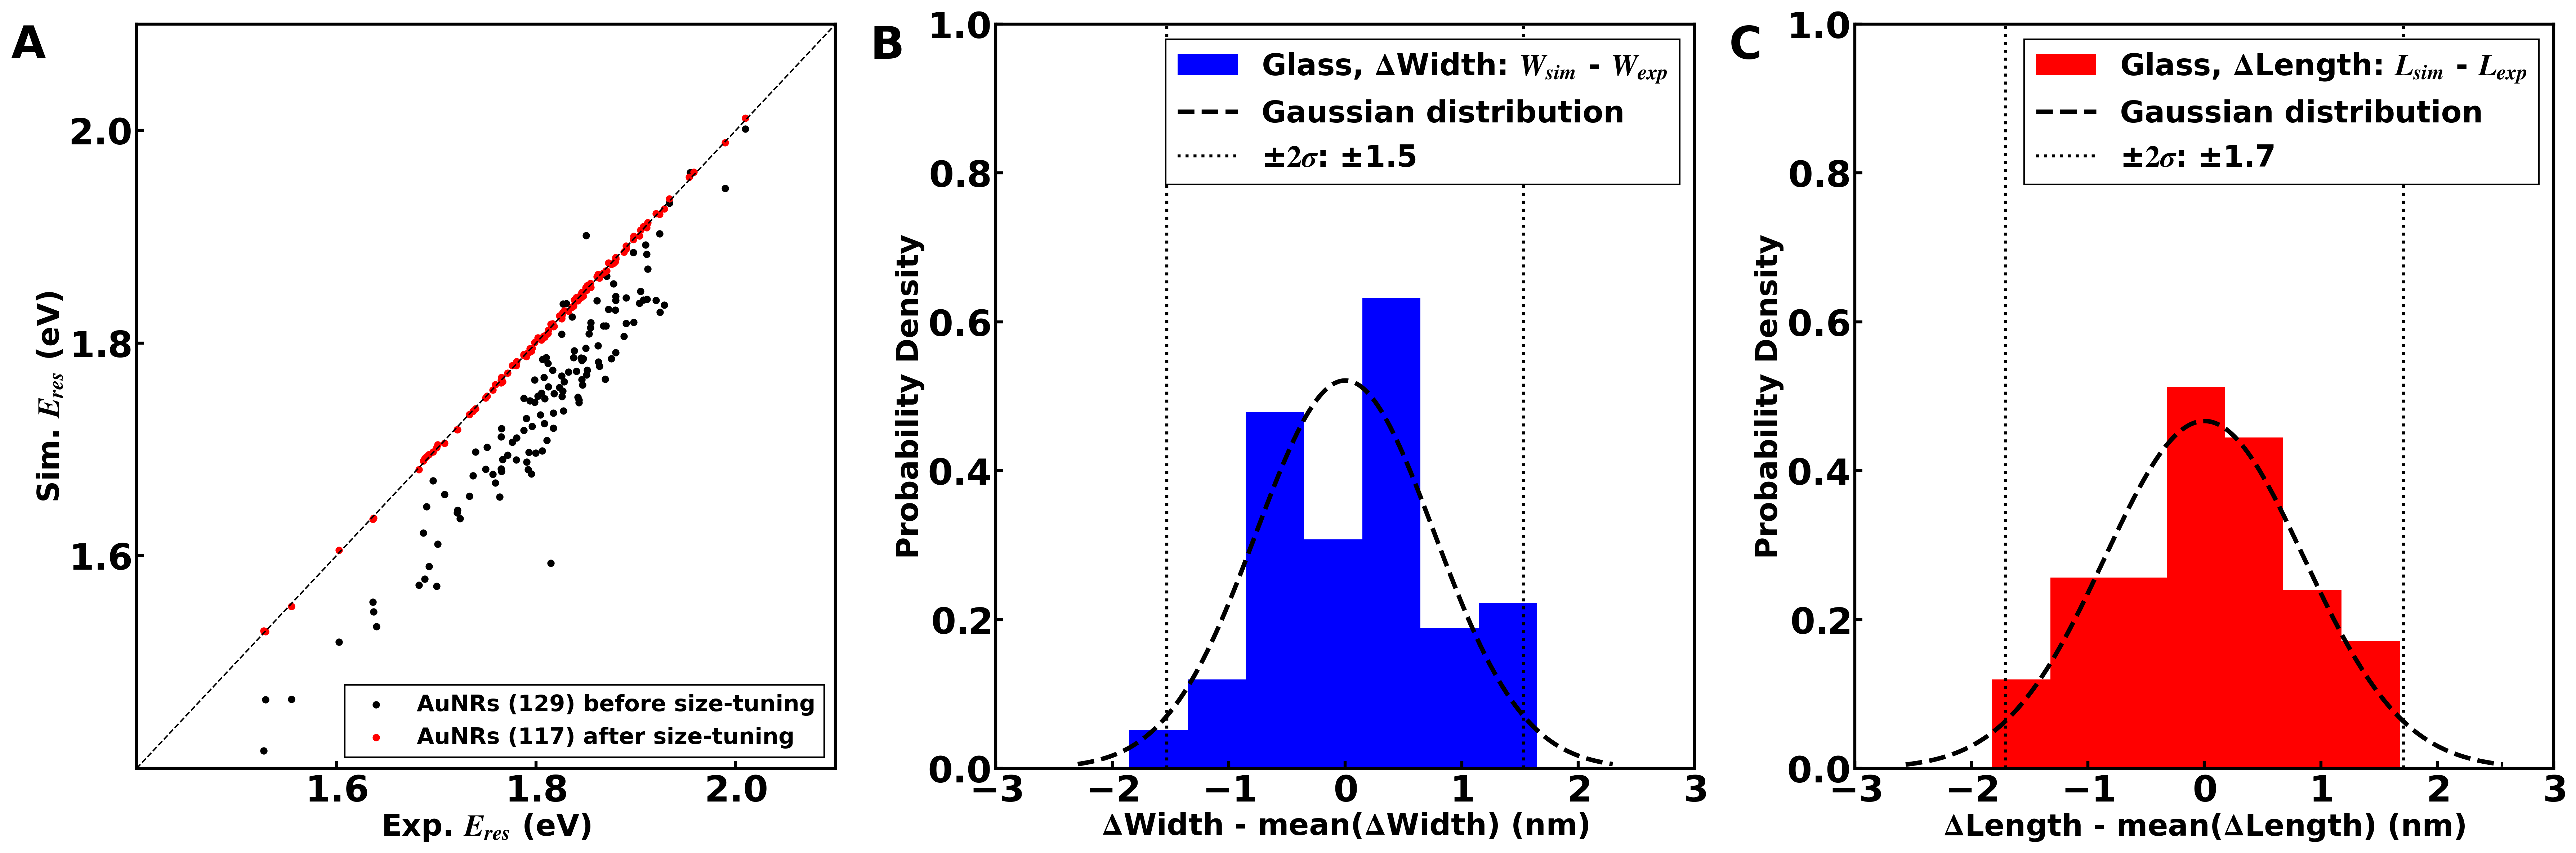

In [149]:
# Create the figure and a set of subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 8), dpi=300) 

# First subplot
x = np.linspace(1.4, 2.1, 100)
ax1.plot(x, x, c='k', lw=1, ls='--')

ax1.scatter(glass_corr_data['Exp_eres'], sim_data_glass['eres'], c='k', s=15, label=f'AuNRs ({sim_data_glass.shape[0]}) before size-tuning')
ax1.scatter(glass_corr_data_combined['Exp_eres'], glass_corr_data_combined['Sim_eres'], c='r', s=15, label=f'AuNRs ({glass_corr_data_combined.shape[0]}) after size-tuning')
ax1.set_xticks([1.6, 1.8, 2.0])
ax1.set_yticks([1.6, 1.8, 2.0])
ax1.set_xlabel('Exp. $E_{res}$ (eV)')
ax1.set_ylabel('Sim. $E_{res}$ (eV)')
ax1.set_xlim([1.4, 2.1])
ax1.set_ylim([1.4, 2.1])
ax1.legend(fontsize=15, loc=4)
ax1.text(-0.18, 1, 'A', ha='left', va='top', transform=ax1.transAxes, fontsize=30)

# Second subplot
binwidth = 0.5
target1 = glass_corr_data_combined['dif_width']
target_avg1 = target1.mean()
target_std1 = target1.std()
ax2.hist(target1-target_avg1, bins=np.arange(min(target1-target_avg1), max(target1-target_avg1)+binwidth, binwidth), color='blue', label='Glass, $\Delta$Width: $W_{sim}$ - $W_{exp}$', density=True)
x = np.linspace(-3 * target_std1, 3 * target_std1, 1000)
y = norm.pdf(x, 0, target_std1)
ax2.plot(x, y, 'k--', label='Gaussian distribution')

ax2.axvline(x=-2 * target_std1, color='k', linestyle='dotted', linewidth=2, label=f'±$2\sigma$: ±{round(2*target_std1, 1)}')
ax2.axvline(x=2 * target_std1, color='k', linestyle='dotted', linewidth=2)
ax2.set_xlabel('$\Delta$Width - mean($\Delta$Width) (nm)')
ax2.set_ylabel('Probability Density')
ax2.set_ylim(0, 1.0)
ax2.set_xlim(-3, 3)
ax2.legend(fontsize=20)
ax2.text(-0.18, 1, 'B', ha='left', va='top', transform=ax2.transAxes, fontsize=30)

# Third subplot
binwidth = 0.5
target2 = glass_corr_data_combined['dif_length']
target_avg2 = target2.mean()
target_std2 = target2.std()
ax3.hist(target2-target_avg2, bins=np.arange(min(target2-target_avg2), max(target2-target_avg2)+binwidth, binwidth), color='red', label='Glass, $\Delta$Length: $L_{sim}$ - $L_{exp}$', density=True)
# Overlay Gaussian curve
x = np.linspace(-3 * target_std2, 3 * target_std2, 1000)
y = norm.pdf(x, 0, target_std2)
ax3.plot(x, y, 'k--', label='Gaussian distribution')

ax3.axvline(x=-2 * target_std2, color='k', linestyle='dotted', linewidth=2, label=f'±$2\sigma$: ±{round(2*target_std2, 1)}')
ax3.axvline(x=2 * target_std2, color='k', linestyle='dotted', linewidth=2)

ax3.set_xlabel('$\Delta$Length - mean($\Delta$Length) (nm)')
ax3.set_ylabel('Probability Density')
ax3.set_ylim(0, 1.0)
ax3.set_xlim(-3, 3)
ax3.legend(fontsize=20)
ax3.text(-0.18, 1, 'C', ha='left', va='top', transform=ax3.transAxes, fontsize=30)

## nomality test

In [145]:
stat1, p_value1 = shapiro(target1 - target_avg1)
print(f'Statistic: {stat1}, p-value: {p_value1}')

stat2, p_value2 = shapiro(target2 - target_avg2)
print(f'Statistic: {stat2}, p-value: {p_value2}')

Statistic: 0.981344997882843, p-value: 0.1036200150847435
Statistic: 0.9815678000450134, p-value: 0.10854431986808777
